In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

class UF:
  def __init__(self, n):
    self.p = list(range(n))

  def find(self, a):
    a_ = a
    while a != self.p[a]:
      a = self.p[a]
    while a_ != a:
      self.p[a_], a_ = a, self.p[a_]
    return a

  def merge(self, a, b):
    self.p[self.find(b)] = self.find(a)

def sol(N, M) :
  Q = [] #쿼리
  E = [] #간선
  for _ in range(M) :
    q, *l = input().split()
    l = tuple(map(int, l))
    Q.append((q, l))
    if q == b'!' :
      E.append(l)
  
  uf = UF(N+1)
  IN = [[] for _ in range(N+1)] 
  OUT = [[] for _ in range(N+1)] 
  for a, b, w in E :
    uf.merge(b, a)
    IN[b].append((a, w))
    OUT[a].append(b)
  
  C = {} #그룹 내에서 가장 무거운 샘플으로부터 상대적인 무게 차이의 합
  def dfs(r) :
    S = [(r, 0)]
    C[r] = 0 #가장 무거운 샘플은 무게가 0
    while S :
      v, w = S.pop()
      for u, w2 in IN[v] :
        if u in C: continue
        C[u] = w + w2
        S.append((u, C[u]))

  for u, out in enumerate(OUT[1:], 1) :
    if out: continue
    dfs(u)

  ans = []
  uf = UF(N+1) #'지금까지 측정한 것'을 시뮬레이션 해야하므로, UF를 초기화한다.
  for q, l in Q: 
    match q :
      case b'!' :
        a, b, w = l
        uf.merge(b, a)
      case _ :
        a, b = l
        if uf.find(a) != uf.find(b) :
          ans.append('UNKNOWN')
        else :
          ans.append(str(C[a] - C[b]))
  
  sys.stdout.write('\n'.join(ans) + "\n")

while (x := input().split()) != [b'0', b'0'] :
  sol(*map(int, x))

- 잘 만든거 같은데 WA가 난다. 아무래도 무슨 반례가 있을지도 모른다.
  - 무게차이는 0일 수 있다. 이 부분에서 뭔가 있는게아닐까?
  - 그런것 같긴 하다. a b 0, b a 0 이런식으로 들어오면 측정에 일관성이 있기도 하고, 정답도 나오지 않는다.

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

class UF:
  def __init__(self, n):
    self.p = list(range(n))

  def find(self, a):
    a_ = a
    while a != self.p[a]:
      a = self.p[a]
    while a_ != a:
      self.p[a_], a_ = a, self.p[a_]
    return a

  def merge(self, a, b):
    self.p[self.find(b)] = self.find(a)

def sol(N, M) :
  Q = [] #쿼리
  E = [] #간선
  for _ in range(M) :
    q, *l = input().split()
    l = tuple(map(int, l))
    Q.append((q, l))
    if q == b'!' :
      E.append(l)
  
  uf = UF(N+1)
  IN = [[] for _ in range(N+1)] 
  OUT = [[] for _ in range(N+1)] 
  for a, b, w in E :
    if uf.find(a) == uf.find(b) : continue #무게 차이가 0이라면 a, b와 b,a가 둘다 나올 수 있다.
    uf.merge(b, a)
    IN[b].append((a, w))
    OUT[a].append(b)
  
  C = {} #그룹 내에서 가장 무거운 샘플으로부터 상대적인 무게 차이의 합
  def dfs(r) :
    S = [(r, 0)]
    C[r] = 0 #가장 무거운 샘플은 무게가 0
    while S :
      v, w = S.pop()
      for u, w2 in IN[v] :
        if u in C: continue
        C[u] = w + w2
        S.append((u, C[u]))

  for u, out in enumerate(OUT[1:], 1) :
    if out: continue
    dfs(u)

  ans = []
  uf = UF(N+1) #'지금까지 측정한 것'을 시뮬레이션 해야하므로, UF를 초기화한다.
  for q, l in Q: 
    match q :
      case b'!' :
        a, b, w = l
        if uf.find(a) == uf.find(b) : continue
        uf.merge(b, a)
      case _ :
        a, b = l
        if uf.find(a) != uf.find(b) :
          ans.append('UNKNOWN')
        else :
          ans.append(str(C[a] - C[b]))
  
  sys.stdout.write('\n'.join(ans) + "\n")

while (x := input().split()) != [b'0', b'0'] :
  sol(*map(int, x))

- 여전히 WA가 뜬다. 사실 위의 반례라면 RE가 떠야하는데, 그렇지 않은 것 부터 예상하곤 있었다.
  - 반례) 1 3 1, 1 2 1 Union find를 하는데에 있어서 상당한 문제가 있었다. 부모가 바뀔 수 있다는 것.

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

class DSU:
  def __init__(self, n):
    self.P = list(range(n))
    self.s = [0] * n #자신의 최종 부모까지의 무게 차이

  def find(self, A):
    while A != self.P[A]:
      A = self.P[A]
    return A

  def update(self, a):
    A = self.find(a)
    if A == a : return A

    delta = 0 #현재 노드에서 갱신해줘야 하는 무게의 차이의 합
    _a = a
    while a != A:
      delta += self.s[a] #최종 부모가 갱신되기 이전에, 그 부모가 최종 부모까지의 무게차이라고 기록했던 값을 누적
      a = self.P[a]
    
    a = _a
    while a != A :
      tmp = self.s[a]
      self.s[a] = delta #각 부모마다 최종 부모까지의 무게 차이를 갱신
      delta -= tmp
      self.P[a], a = A, self.P[a]
    return A

  def union(self, a, b, w):
    A, B = self.update(a), self.update(b)
    if A == B : return
    
    if self.s[A] < self.s[B] :
      A, B = B, A
    self.P[B] = A
    self.s[B] = self.s[a] - self.s[b] + w
    #부모 사이의 가중치 + 새로운 간선의 가중치(자식 사이의 거리 차)

    self.P[b] = a
    self.s[b] = w
  
  def query(self, a) :
    self.update(a)
    return self.s[a]

def sol(N, M) :
  Q = [] #쿼리
  for _ in range(M) :
    q, *l = input().split()
    l = tuple(map(int, l))
    Q.append((q, l))

  ans = []
  uf = DSU(N+1)
  for q, l in Q: 
    match q :
      case b'!' :
        a, b, w = l
        if uf.find(a) == uf.find(b) : continue
        uf.union(b, a, w)
      case _ :
        a, b = l
        if uf.find(a) != uf.find(b) :
          ans.append('UNKNOWN')
        else :
          ans.append(str(uf.query(a) - uf.query(b)))
  
  sys.stdout.write('\n'.join(ans) + "\n")

while (x := input().split()) != [b'0', b'0'] :
  sol(*map(int, x))

### 자력솔
- 어떤 두 수 $A, B$ 를 비교하려면 $A$ 와 $B$ 사이에 순서 관계가 성립되어 있어야 한다.
  - 이 문제에선 두 수의 무게 차이를 선언함으로써 그 순서 관계가 성립된다.
  - 무게 차이가 성립된 것은 분리집합을 통해 관리할 수 있다.
  - strict weak ordering 공부하면서 잠깐 파본 집합론의 relation에 대한 공부가, 이 문제를 푸는 핵심 아이디어가 됐을줄은 상상도 못했다. \
  역시 공부는 하고볼 일이다.
- 집합 관계가 정리되면, 가장 무거운 샘플을 기준으로 얼만큼 더 가벼운지를 기록하여 무게 차이를 구분할 수 있게된다.
  - 처음에 진입차수와 진출차수를 기록하여 진출차수가 없는 노드가 가장 무거운 샘플인줄 알았으나, \
  위의 반례에서 봤듯 가장 무거운 샘플은 바뀔수도 있기 때문에 현재와 같은 구현이 됐다.
- 분리집합에 부모노드 정보 이외에 다른 정보를 둘 수 있다는 발상이 있었다. \
그리고 이 정보를 path compression과 union by height 최적화를 적용할 때 적절히 업데이트 해줄 수 있다.
  - 정확히는, path compression이 없으면 더 구현이 쉬웠을 것이라 생각한 것이였는데, 그렇게되면 $O(N^2)$ 이 될 수 있어서 최적화에 맞춘 것이였다.
  - 그리고 union by height는, 매번 분리집합 문제를 풀 때 오답을 내게하는 원인의 코드를 역이용해보자는 아이디어였다.\
  더 무게가 높은 것을 항상 부모로 두게 설정하는 방식으로 설정할 수 있을 것이라 예상했고, 그 예상은 맞았다.
- 부모가 갱신될 때, 무게 차이가 더 낮은쪽의 부모(고점이 낮다고 봐도 될 것 같다)를 $B$, 더 높은쪽의 부모를 $A$ 라고 했을 때 $B$ 와 $A$ 사이의 거리는\
($a$ 와 $A$ 의 무게 차이) ($b$ 와 $B$ 의 무게 차이)의 차이 + $a, b$ 사이의 무게 차이(`w`)이다. 이 부분은 직접 계산해봤을 땐 당연한 수치이지만, 의미를 해석하니 약간 생소했다.\
두 개의 다른 집합을 합치는 과정에서 필요한 당연한 연산이라고 생각하는 것이 편할 것 같다.
  - 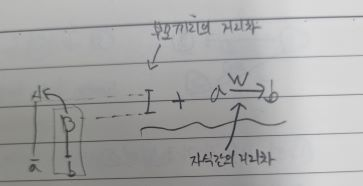

In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

class DSU:
  def __init__(self, n):
    self.P = list(range(n))
    self.s = [0] * n #자신의 최종 부모까지의 무게 차이

  def _find(self, a):
    acc = 0 #현재 노드에서 갱신해줘야 하는 무게의 차이의 합
    while a != self.P[a]:
      acc += self.s[a] #최종 부모가 갱신되기 이전에, 그 부모가 최종 부모까지의 무게차이라고 기록했던 값을 누적
      a = self.P[a]
    return a, acc

  def find(self, a):
    A, left = self._find(a)
    if A == a : return A

    while a != A :
      dt = self.s[a]
      self.s[a] = left #각 부모마다 최종 부모까지의 무게 차이를 갱신
      left -= dt
      self.P[a], a = A, self.P[a]
    return A

  def union(self, a, b, w):
    A, B = self.find(a), self.find(b)
    if A == B : return
    
    if self.s[A] < self.s[B] : #무게가 더 무거운 쪽이 A
      A, B = B, A
    self.P[B] = A #무게가 더 무거운 쪽을 부모로 설정
    self.s[B] = self.s[a] - self.s[b] + w 
    #부모 사이의 가중치 + 새로운 간선의 가중치(자식 사이의 거리 차)

    self.P[b] = a #업데이트할 내용을 예약. 다음 compression때 업데이트된다
    self.s[b] = w
  
  def query(self, a):
    return self.s[a]

def sol(N, M) :
  ans = []
  uf = DSU(N+1)
  for _ in range(M) :
    q, *l = input().split()
    match q :
      case b'!' :
        a, b, w = map(int, l)
        uf.union(b, a, w)
      case _ :
        a, b = map(int, l)
        if uf.find(a) != uf.find(b) :
          ans.append('UNKNOWN')
        else :
          ans.append(str(uf.query(a) - uf.query(b)))
  
  sys.stdout.write('\n'.join(ans))
  sys.stdout.write("\n")

while (x := input().split()) != [b'0', b'0'] :
  sol(*map(int, x))

- 너무 오래걸려서 뭔가했더니 쿼리할 때 path compression이 적용되지 않는 union.find가 적용되고 있었다.
  - 필요없는 부분을 전부 제하니 1위가 됐다..

2 2
! 1 2 1
? 1 2
2 2
! 1 2 1
? 2 1
4 7
! 1 2 100
? 2 3
! 2 3 100
? 2 3
? 1 3
! 4 3 150
? 4 1
0 0
;;
3 4
! 1 2 0
! 2 1 0
! 3 1 20
? 3 1
0 0
;;
5 6
! 1 2 1
! 3 4 1
! 2 5 3
? 3 5
! 3 5 5
? 2 5
0 0
;;
3 3
! 1 2 2
! 1 3 3
? 2 3
0 0